In [1]:
%cd /Users/mac626/Documents/GitHub/sign_detection/py

/Users/mac626/Documents/GitHub/sign_detection/py


In [2]:
from basic_preprocessing import *

### img, xml, count

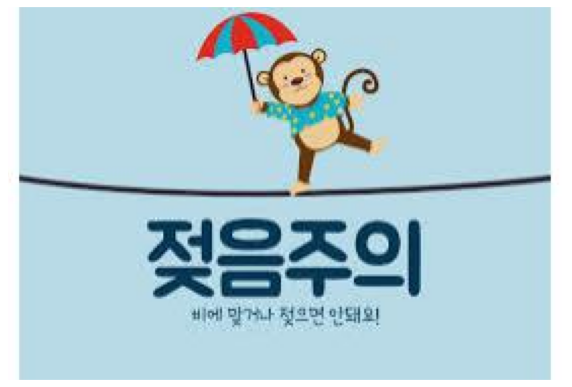

이미지수 294
None


In [3]:
file_path = '/Users/mac626/Documents/Kor-Rus/sign recognition/logistics sign.v3i.voc/train'
data_path = os.path.join(file_path, '*g')
file_img_list = glob.glob(data_path)
file_img_list.sort()

img_list=[]
for i in file_img_list:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_list.append(img)
show(img_list[1])
print(count_img(file_path))

In [4]:
#파일이름_경로제외

img_file_list=[]

for i in file_img_list:
    i = i.split('.jpg')[0].split('/')[-1].split('rf.')[-1]
    img_file_list.append(i)

In [5]:
file_list = os.listdir(file_path)
xml_list = [file for file in file_list if file.endswith('.xml')]
xml_list.sort()
print(len(xml_list))

294


In [6]:
xml_file_list = []

for i in xml_list:
    i = file_path+'/'+i
    xml_file_list.append(i)
    xml_file_list.sort()

In [7]:
#root list

root_list = []

for i in xml_file_list:
    tree = ET.parse(i)
    root = tree.getroot()
    root_list.append(root)

#### annotation count

In [8]:
class_names = []
file_names = []

for num, i in enumerate(root_list):
    for obj in i.findall('object'):
        class_name = obj.find('name').text
        class_names.append(class_name)
        file_names.append(xml_list[num])
        
class_count_df = pd.DataFrame({'file_name':file_names, 'class_name':class_names})
df_class_count = pd.DataFrame(class_count_df['file_name'].value_counts())
df_class_count = df_class_count.reset_index()
df_class_count = df_class_count.rename(columns ={'index':'file_name', 'file_name':'label_count'})

In [34]:
class_count_df.class_name.value_counts()

ice            115
frozen          73
keep dry        67
dry_keep        66
time            64
up              60
fast            54
care            50
caution         47
with care       38
cut             37
knife           35
up_up           32
fragile_cup     17
fragile         11
Name: class_name, dtype: int64

In [ ]:
df_class_count.head()

#### 자동화

In [50]:
ice_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/ice/'
frozen_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/frozen/'
keepdry_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/keep dry/'
dry_keep_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/dry_keep/'
time_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/time/'
up_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/up/'
fast_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/fast/'
care_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/care/'
caution_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/caution/'
withcare_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/with care/'
cut_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/cut/'
knife_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/knife/'
upup_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/upup/'
fragile_cup_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/fragile_cup/'
fragile_save_path = '/Users/mac626/Documents/Kor-Rus/trimming/fragile/'

save_path = '/Users/mac626/Documents/Kor-Rus/trimming/'

In [13]:
#순서확인, 정상시 output 없음
for i in range(len(xml_file_list)):
    if xml_file_list[i].split('.xml') != file_img_list[i].split('.jpg'):
        print(i)

In [ ]:
ice            115
frozen          73
keep dry        67
dry_keep        66
time            64
up              60
fast            54
care            50
caution         47
with care       38
cut             37
knife           35
up_up           32
fragile_cup     17
fragile         11

In [54]:
for num, i in enumerate (xml_file_list):
    tree = ET.parse(i)
    root = tree.getroot()
    
    img_name = i.replace('xml','jpg')
#     print(img_name)
    img = INPUT_IMG(img_name)
    for_trim = img.copy()
#     show(for_trim)
    
    for obj in root.findall('object'):
        xmlbox = obj.find('bndbox')
        
        left = int(xmlbox.find('xmin').text)
        top = int(xmlbox.find('ymin').text)
        right = int(xmlbox.find('xmax').text)
        bottom = int(xmlbox.find('ymax').text)
        
        class_name=obj.find('name').text
        try:
            if class_name=='ice':
                cv2.imwrite(ice_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='frozen':
                cv2.imwrite(frozen_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='keep dry':
                cv2.imwrite(keepdry_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='dry_keep':
                cv2.imwrite(dry_keep_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='time':
                cv2.imwrite(time_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='up':
                cv2.imwrite(up_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='fast':
                cv2.imwrite(fast_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='care':
                cv2.imwrite(care_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='caution':
                cv2.imwrite(caution_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='with care':
                cv2.imwrite(withcare_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='cut':
                cv2.imwrite(cut_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='knife':
                cv2.imwrite(knife_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='up_up':
                cv2.imwrite(upup_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='fragile_cup':
                cv2.imwrite(fragile_cup_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            elif class_name =='fragile':
                cv2.imwrite(fragile_save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
            else:
                cv2.imwrite(save_path+'{}{}{}.jpg'.format(class_name, img_file_list[num], num),
                            cv2.cvtColor(for_trim[top:bottom, left:right], cv2.COLOR_BGR2RGB))
                print(class_name,'완료')
        except:
            print(x)

cut 완료
dry_keep 완료
fragile_cup 완료
fragile 완료
caution 완료
ice 완료
frozen 완료
frozen 완료
frozen 완료
keep dry 완료
dry_keep 완료
fragile 완료
fragile_cup 완료
ice 완료
frozen 완료
frozen 완료
ice 완료
frozen 완료
ice 완료
ice 완료
ice 완료
frozen 완료
knife 완료
cut 완료
ice 완료
frozen 완료
fast 완료
time 완료
fast 완료
time 완료
keep dry 완료
dry_keep 완료
frozen 완료
ice 완료
keep dry 완료
dry_keep 완료
fast 완료
fast 완료
time 완료
fast 완료
time 완료
up 완료
fast 완료
time 완료
up 완료
fast 완료
time 완료
care 완료
dry_keep 완료
dry_keep 완료
keep dry 완료
keep dry 완료
keep dry 완료
keep dry 완료
dry_keep 완료
dry_keep 완료
keep dry 완료
caution 완료
keep dry 완료
keep dry 완료
keep dry 완료
care 완료
with care 완료
up 완료
keep dry 완료
dry_keep 완료
caution 완료
care 완료
keep dry 완료
dry_keep 완료
keep dry 완료
dry_keep 완료
dry_keep 완료
keep dry 완료
keep dry 완료
keep dry 완료
ice 완료
frozen 완료
dry_keep 완료
up 완료
keep dry 완료
knife 완료
cut 완료
frozen 완료
ice 완료
keep dry 완료
dry_keep 완료
up 완료
up 완료
dry_keep 완료
keep dry 완료
dry_keep 완료
keep dry 완료
up 완료
up_up 완료
knife 완료
cut 완료
keep dry 완료
dry_keep 완료
dry_keep 완료
keep dry

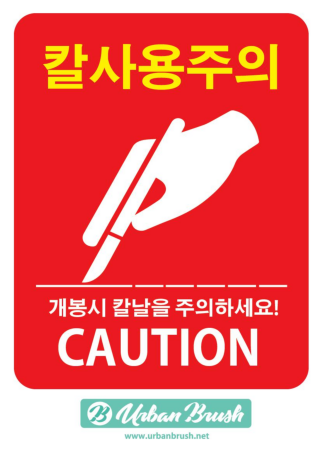

True

In [49]:
test_img= file_img_list[0]
test_img = INPUT_IMG(test_img)
show(test_img)
save_path = '/Users/mac626/Documents/Kor-Rus'
cv2.imwrite(save_path+'dd.jpg', cv2.cvtColor(test_img[10:250, 10:250], cv2.COLOR_BGR2RGB))